# Oscilador armónico amortiguado

![Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires](figuras/logoDF.png "DF, FCEyN, UBA")  
©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

----

## Amortiguación proporcional a la velocidad
<!--
![](figuras/shabana1996_fig5_6.png)  
-->
![](figuras/shabana_fig_1_11.png)  
La dinámica del sistema de la figura estará determinada por  
- m : masa
- k : rigidez (_stiffness_) de un resorte que proveé una fuerza elástica según el modelo de Hooke, $\vec{F}_\mathrm{elástica} = - k x \hat{x}$
- c : coeficiente de la fuerza de amortiguación modelizada lineal con la velocidad, provista por un amortiguador en cuyo interior un pistón está sumergido en un fluido viscoso como el aceite, $\vec{F}_\mathrm{amortiguación} = - c \dot{x} \hat{x}$
- F(t) : un fuerza externa arbitaria en el tiempo que eventualmente lo saque del equilibrio. 

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True) # características del sistema, magnitudes positivas
x, F = mech.dynamicsymbols('x, F') # coordenada y fuerza externa

In [3]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
V = sym.Eq( sym.Symbol('V'), unMedio* k* x**2) # Energía potencial
V

En los sistemas que vimos siempre las fuerzas se obtenian de potenciales, es decir son conservativas, y en ese caso la 2.a ley de Newton sería

In [4]:
segundaLey_conservativas = sym.Eq( m* x.diff(t,2), -V.rhs.diff(x) ) # diff: derivar, rhs: lado derecho de ecuación
segundaLey_conservativas

Pero en este caso no se pude soslayar que hay fuerzas no conservativas actuando sobre el sistema.  
![](figuras/shabana_fig_1_11b.png)

In [5]:
f_NoConservativas = sym.Eq(sym.Symbol('F_{nc}'), F - c* x.diff(t) )
f_NoConservativas

No debemos olvidar estas fuerzas en el lado derecho de la 2.a ley.

In [6]:
segundaLey = sym.Eq( m* x.diff(t,2), -V.rhs.diff(x)+ f_NoConservativas.rhs )
segundaLey

## Dinámica
Esta ecuación diferencial lineal de segundo orden no es homogénea a causa de $F(t)$.

In [7]:
x_Dinámica_noHomogénea = sym.solve(segundaLey, F)[0] 
sym.Eq( x_Dinámica_noHomogénea, F) 

Analizaremos primero la solución para el caso homogéneo, esto es si $F = 0$.

In [8]:
x_Dinámica_Homogénea =  x_Dinámica_noHomogénea.subs(F,0)
sym.Eq(x_Dinámica_Homogénea, 0)

Esta ecuación se suele normalizar por la masa

In [9]:
x_Dinámica_masa = (x_Dinámica_Homogénea/ m).expand()
sym.Eq(x_Dinámica_masa, 0)

y asignarle símbolos particulares a los coeficientes de $x$ y $\dot{x}$:
- $\omega^2 = \frac{k}{m}$, siendo $\omega$ la frecuencia natural de oscilación del sistema 
- $\Gamma = \frac{c}{m}$. En algunos textos de física $\gamma$. En ingeniería se usa $\zeta = \frac{c}{m} \frac{1}{2 \omega}$.

In [10]:
omega, Gamma = sym.symbols('omega Gamma', real = True)
# omega = sym.symbols('omega', real = True)
# Gamma = sym.symbols('Gamma', positive = True)
x_Dinámica_masa = x_Dinámica_masa.subs([(k/m, omega**2), (c/m, Gamma) ]).simplify()
sym.Eq(x_Dinámica_masa, 0)

Ya vimos como proponiendo una solución con exponenciales complejas se puede resolver esta ecuación.

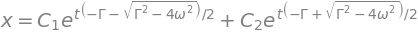

In [11]:
x_Dinámica_sol = sym.dsolve(x_Dinámica_masa)
x_Dinámica_sol

Esta es una combinación lineal de las dos posible soluciones, pesadas por los coeficientes $C_i$.

## Analizando la dinámica

Lo primero que salta a la vista es que hay un factor común
$$
\operatorname{e}^{- \frac{\Gamma}{2} t},
$$
que paulatinamente irá reduciendo la amplitud de $x(t)$ y para $t \to \infty$ ``matará'' la dinámica.
Que tán rápido sucede esto se cuantifica con un **período de relajación** $\tau = 2 \Gamma^{-1}$ en que la amplitud decae en $\operatorname{e}^{-1}$.
A los fines experimentales se considera que trancurrido $\sim 10 \tau$ la oscilación se considera extinta.

Luego se hace evidente que la relación del amortiguamiento $\Gamma$ y la frecuencia de oscilación $\omega$ determina la dinámica. Si
- $\Gamma^2 = 4 \omega^2$, solo queda el factor común visto,
- $\Gamma^2 < 4 \omega^2$ la raiz da un complejo dándonos oscilaciones,
- $\Gamma^2 > 4 \omega^2$ el amortiguamiento no da tiempo a que el sistema oscile.

### Críticamente amortiguado
Si $\Gamma = 2 \omega$ se logra el comportamiento más sencillo

In [12]:
x_crit = x_Dinámica_sol.subs(Gamma, 2* omega).simplify()
x_crit

que se trata de un acercamiento exponencial a la posición de equilibrio. 

Para visualizar estos comportamientos pueden determinarse los $C_i$ en función de los $x$ y $\dot{x}$ conocidos en un determinado $t$, las llamadas condiciones iniciales.

Si para $t_0 = 0$ conocemos $x_0 = x(t_0)$ y $\dot{x}_0 = \dot{x}(t_0)$

In [13]:
x_0, dx_0 = sym.symbols('x_0 \dot{x}_0', real=True)
crit_condInic = [sym.Eq(x_0, x_crit.args[1].subs(t, 0) ), sym.Eq(dx_0, x_crit.args[1].diff(t).subs(t, 0) ) ]
crit_condInic

de las que pueden despejarse los $C_i$ 

In [14]:
crit_condInic_sol = sym.solve(crit_condInic)
crit_condInic_sol

In [15]:
x_crit_condInic = x_crit.subs(crit_condInic_sol[0] )
x_crit_condInic.simplify()

Si por ejemplo asignamos

In [16]:
k = 100 # [N m-1]
m = 1 # [kg]
x_0_magnitud = 1 # [m]
dx_0_magnitud = -100 # [m s-1]

parametros ={
    x_0 : x_0_magnitud,
    dx_0 : dx_0_magnitud,
    omega : sym.sqrt(k/m)
}
x_crit_parametros = x_crit_condInic.subs(parametros)
x_crit_parametros

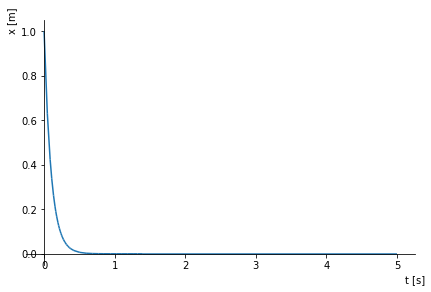

In [17]:
sym.plot(x_crit_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Sobreamortiguado
Si $\Gamma > 2 \omega $ el amortiguamiento es aún más pronunciado, e.g. $\Gamma = 4 \omega$

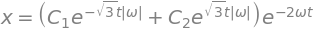

In [18]:
x_sobre = x_Dinámica_sol.subs(Gamma, 4* omega).simplify()
x_sobre

también habrá un acercamiento exponencial a $x=0$, pero puede haber violentas oscilaciones antes de alcanzar el punto de equilibrio.

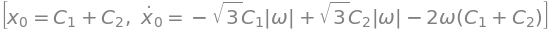

In [19]:
sobre_condInic = [sym.Eq(x_0, x_sobre.args[1].subs(t, 0) ), sym.Eq(dx_0, x_sobre.args[1].diff(t).subs(t, 0) ) ]
sobre_condInic_sol = sym.solve(sobre_condInic)
sobre_condInic

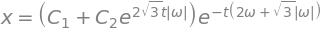

In [20]:
# x_sobre_condInic = x_sobre.subs(sobre_condInic_sol[0] )
x_sobre_condInic = x_sobre.subs(sobre_condInic_sol )
x_sobre_condInic.simplify()

Con las mismas condiciones iniciales

In [21]:
x_sobre_parametros = x_sobre_condInic.subs(parametros)
sym.plot(x_sobre_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

ValueError: The same variable should be used in all univariate expressions being plotted.

### Subamortiguado, $0< \zeta < 1$
El caso más frecuente es cuando se busca que la amortiguación no sea brusca   

In [ ]:
x_sub = xDinámicaIng_sol.subs(zeta, 0.2)
x_sub

Las exponenciales complejas con $i t$ pueden re-escribirse como funciones trigonométricas con igualdad de Euler $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$.

$$
x= \left[ (C_1+ C_2) \cos{\omega t} + i(C_1- C_2) \sin{\omega t} \right] \operatorname{e}^{- \zeta \omega t}
$$
que presenta se observara una reducción de la amplitud de las oscilaciones en torno a la posición de equilibrio.


y escribir una solución de la dinámica en función de tales condiciones

In [ ]:
sub_condInic = [sym.Eq(x_0, x_sub.args[1].subs(t, 0) ), sym.Eq(dx_0, x_sub.args[1].diff(t).subs(t, 0) ) ]
sub_condInic_sol = sym.solve(sub_condInic)
x_sub_condInic = x_sub.subs(sub_condInic_sol[0] )
x_sub_condInic

In [ ]:
x_sub_parametros = x_sub_condInic.subs(parametros)
sym.plot(x_sub_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### No amortiguado, $\zeta = 0$

In [ ]:
x_noAmortiguado = xDinámicaIng_sol.subs(zeta, 0)
x_noAmortiguado

In [ ]:
noAmortiguado_condInic = [sym.Eq(x_0, x_noAmortiguado.args[1].subs(t, 0) ), sym.Eq(dx_0, x_noAmortiguado.args[1].diff(t).subs(t, 0) ) ]
noAmortiguado_condInic_sol = sym.solve(noAmortiguado_condInic)
x_noAmortiguado_condInic = x_noAmortiguado.subs(noAmortiguado_condInic_sol[0] )
x_noAmortiguado_condInic

In [ ]:
x_noAmortiguado_parametros = x_noAmortiguado_condInic.subs(parametros)
sym.plot(x_noAmortiguado_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 